### INTRODUCTION: Analysing House Sales in King County 
Introduction:  
Welcome to our data-driven exploration of the King County House Sales dataset! In this project, we’ll delve into the fascinating world of real estate, armed with regression modeling techniques. Our mission? To unravel the hidden patterns, predict housing prices, and provide valuable insights to stakeholders.

 The Dataset:  
The King County House Sales dataset is our treasure trove—a collection of information about home sales in a picturesque northwestern county. Each row represents a house, and the columns hold secrets about square footage, bedrooms, bathrooms, and more. But beware: like any good mystery, some column names are cryptic, and we’ll need our detective hats to decipher them.

Our Quest:  
Our stakeholder? Imagine a bustling real estate agency. They’re on a quest to empower homeowners with knowledge. Specifically, they want to advise homeowners on how renovations impact their home’s estimated value. Should you invest in that swanky kitchen remodel? Will that extra bedroom boost your asking price? Fear not—we’ll find answers!

## Problem Statement:  
In the picturesque realm of King County, where rolling hills meet shimmering lakes, a bustling real estate agency seeks our expertise. Their mission? To empower homeowners with knowledge—knowledge that could sway the fate of kitchen renovations, bedroom additions, and backyard transformations.

Background:  
King County, nestled in the heart of the Pacific Northwest, boasts a diverse housing market. From cozy bungalows to modern mansions, each abode tells a story. But behind the charming facades lie mysteries: What factors truly influence home prices? How do renovations impact value? Our agency yearns for answers.

## Objectives
Identify Key Features that Influence House Prices:
We want to understand what drives house prices so we can make informed decisions. This involves looking at various characteristics of homes, such as size, number of bathrooms, year of renovation, and quality of construction.

Analyze the Relationship Between Key Features and House Prices:
This step involves examining how different features, such as location or the number of bedrooms, affect the price of a house. We will look at patterns and trends to see which features add the most value.

Develop a Predictive Model for House Prices:
Build a reliable system that can accurately predict house prices based on the identified key features.
Using the insights from our analysis, we will create a model (a type of tool) that can predict house prices. This model will use the data we have about house features and past prices to forecast future prices.

 #### So, fellow data sorcerer, let’s unravel the spells woven within the King County House Sales dataset. Our wands? Jupyter notebooks and curiosity. Our quest? To illuminate the path for homeowners and unveil the magic of real estate.

### IMPORTS AND DATA LOADING

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge



c:\Users\pcx\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\pcx\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Inspecting Data

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [5]:
df.shape

(21597, 21)

1. Number of Rows (Observations): There are 21597 rows in the DataFrame.
2. Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

#### Data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Data description of Numerical Column

In [7]:
df.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

## Data cleaning

In [8]:
#checking for missing values in our data
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### The output indicates the count of missing values (NaN or null values) for each column in the Boston Housing dataset:
1. waterfront:2376 missing values , view: 63 missing values, INDUyr_renovated: 3842 missing values.
2. id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement,  yr_built, zipcode, lat, long, sqft_living15, sqft_lot15: No missing values.

In [9]:
# Defining a function to return percentage of missing values
def missing_values(df):
    #Identify the total missing values per column and sort
    miss = df.isna().sum().sort_values(ascending = False)
    
    #Calculating percentage of missing values and sorting
    percent_miss = (df.isna().sum()/len(df)).sort_values(ascending = False)
    
    #Store in dataframe
    missing = pd.DataFrame({'Missing values':miss, 'Percentage %':percent_miss*100})
    
    return missing

missing_vals = missing_values(df)
missing_vals

Missing values  Percentage %
yr_renovated             3842     17.789508
waterfront               2376     11.001528
view                       63      0.291707
id                          0      0.000000
sqft_above                  0      0.000000
sqft_living15               0      0.000000
long                        0      0.000000
lat                         0      0.000000
zipcode                     0      0.000000
yr_built                    0      0.000000
sqft_basement               0      0.000000
condition                   0      0.000000
grade                       0      0.000000
date                        0      0.000000
floors                      0      0.000000
sqft_lot                    0      0.000000
sqft_living                 0      0.000000
bathrooms                   0      0.000000
bedrooms                    0      0.000000
price                       0      0.000000
sqft_lot15                  0      0.000000

After inspecting data the percentage of missing data was established to be negligable and we decided to drop the null values

In [10]:
# Separate numeric and non-numeric columns as our data contains both float, integers and Objects

numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill NaN values in non-numeric columns with the mode or median if needed
# Example for filling with mode:
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# If you want to fill non-numeric columns with the median (which might not make sense for non-numeric data):
# for col in non_numeric_cols:
#     df[col].fillna(df[col].median(), inplace=True)

Rechecking for Null Values

In [11]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# checking for duplicates
df.duplicated().sum()

0

## Checking for Outliers

id Outliers:
Series([], Name: id, dtype: int64)


price Outliers:
5        1230000.0
21       2000000.0
49       1350000.0
69       1330000.0
125      1450000.0
           ...    
21552    1700000.0
21560    3570000.0
21574    1220000.0
21581    1580000.0
21584    1540000.0
Name: price, Length: 1158, dtype: float64


bedrooms Outliers:
154      1
209      6
232      6
239      6
264      1
        ..
21359    6
21427    1
21503    1
21506    6
21536    1
Name: bedrooms, Length: 530, dtype: int64


bathrooms Outliers:
5        4.50
75       4.00
235      4.00
270      4.75
300      5.00
         ... 
21535    4.50
21545    4.00
21560    4.50
21577    3.75
21584    3.75
Name: bathrooms, Length: 561, dtype: float64


sqft_living Outliers:
5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21535    4350
21545    4500
21560    4850
21574    4910
21584    4470
Name: sqft_living, Length: 571, dtype: int64


sqft_lot Outliers:
5        101930
12        19901
21

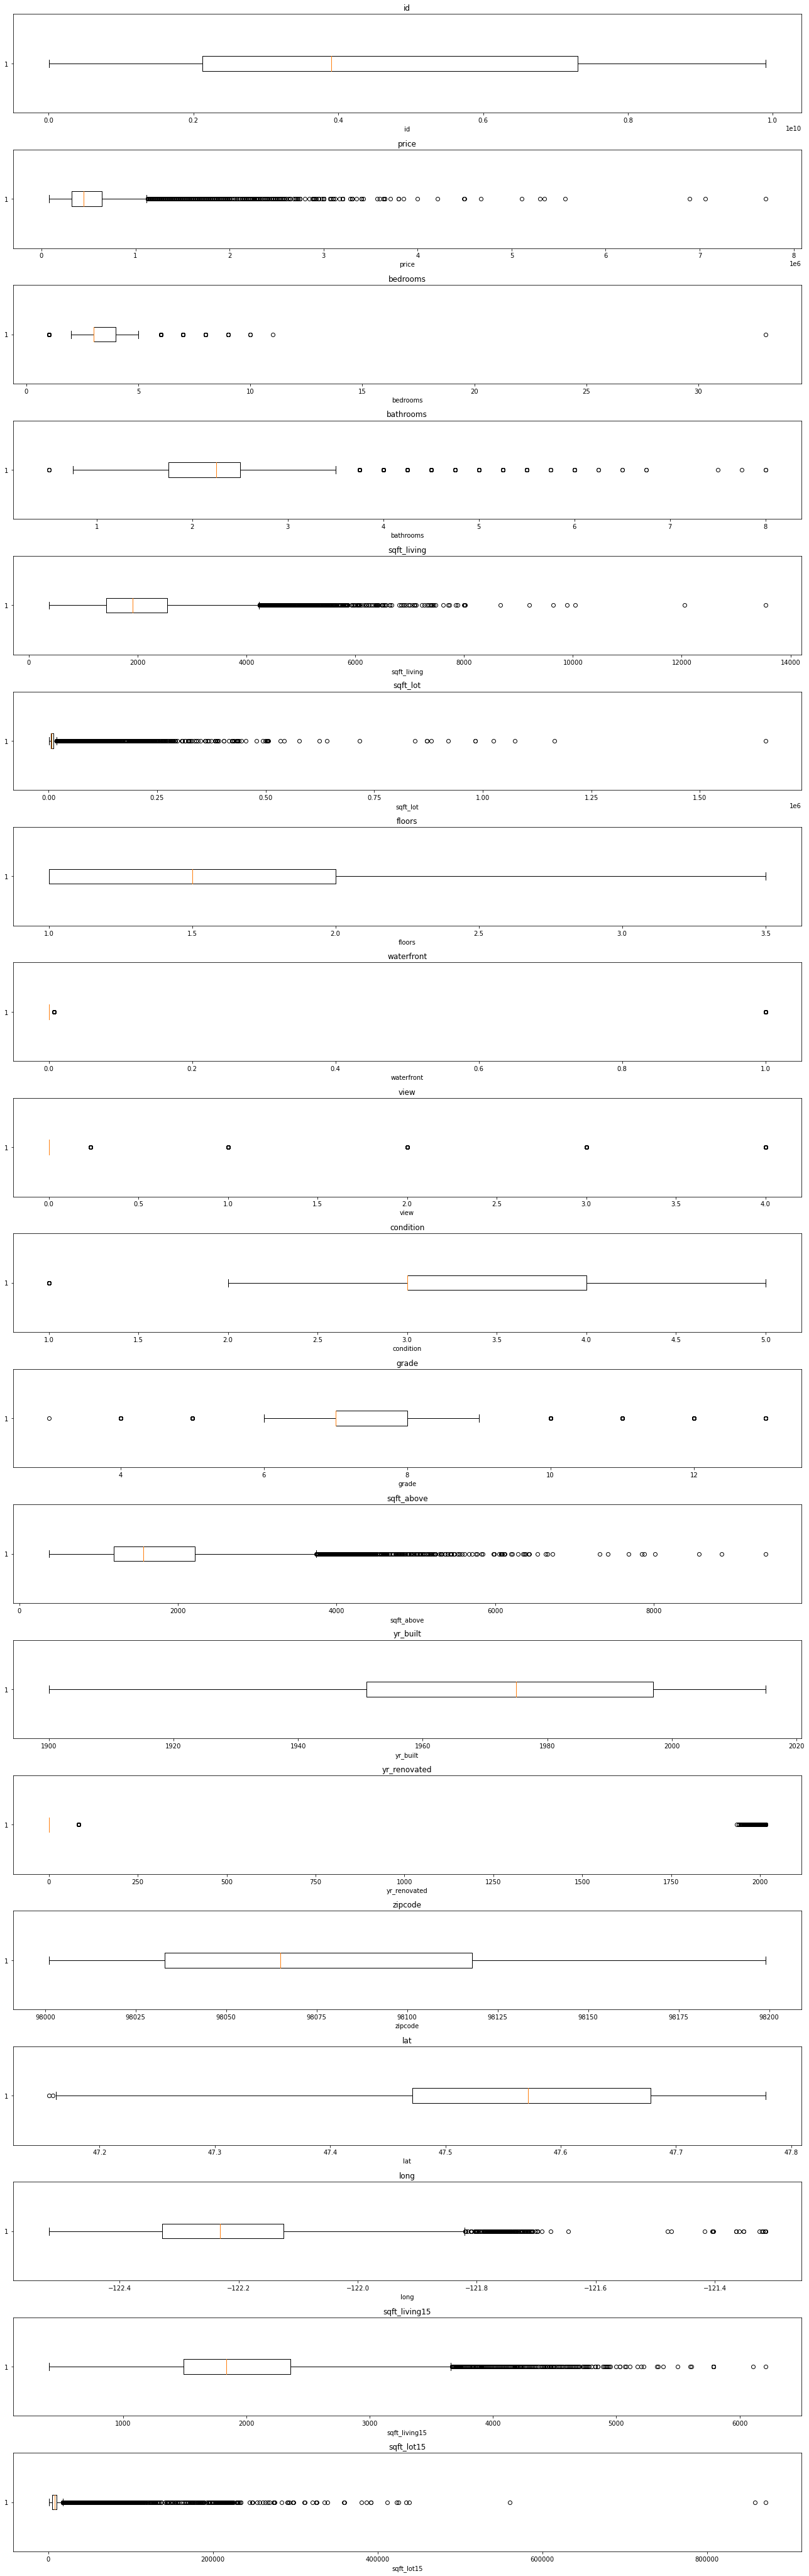

In [13]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)  # Calculate the first quartile (Q1)
    Q3 = data.quantile(0.75)  # Calculate the third quartile (Q3)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]  # Identify outliers
    return outliers

# Get all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Detect and store outliers for each numeric column
outliers_dict = {}
for col in numeric_cols:
    outliers_dict[col] = detect_outliers(df[col])

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"{col} Outliers:")
    print(outliers)
    print("\n")

# Plotting the data with outliers
plt.figure(figsize=(18, len(numeric_cols) * 3))

# Create box plots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'{col}')
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()


We decided to retain the outliers as it represent the real world market.

# EDA

## Analysis

Questions to answer
1. What are the top features that have the strongest correlation with house prices in King County?
2. How do changes in features like square footage, grade, and number of bathrooms affect house prices?
3. Can we create a reliable linear regression model to predict house prices based on key features, and what are the expected improvements after renovations?



### PAIR PLOT

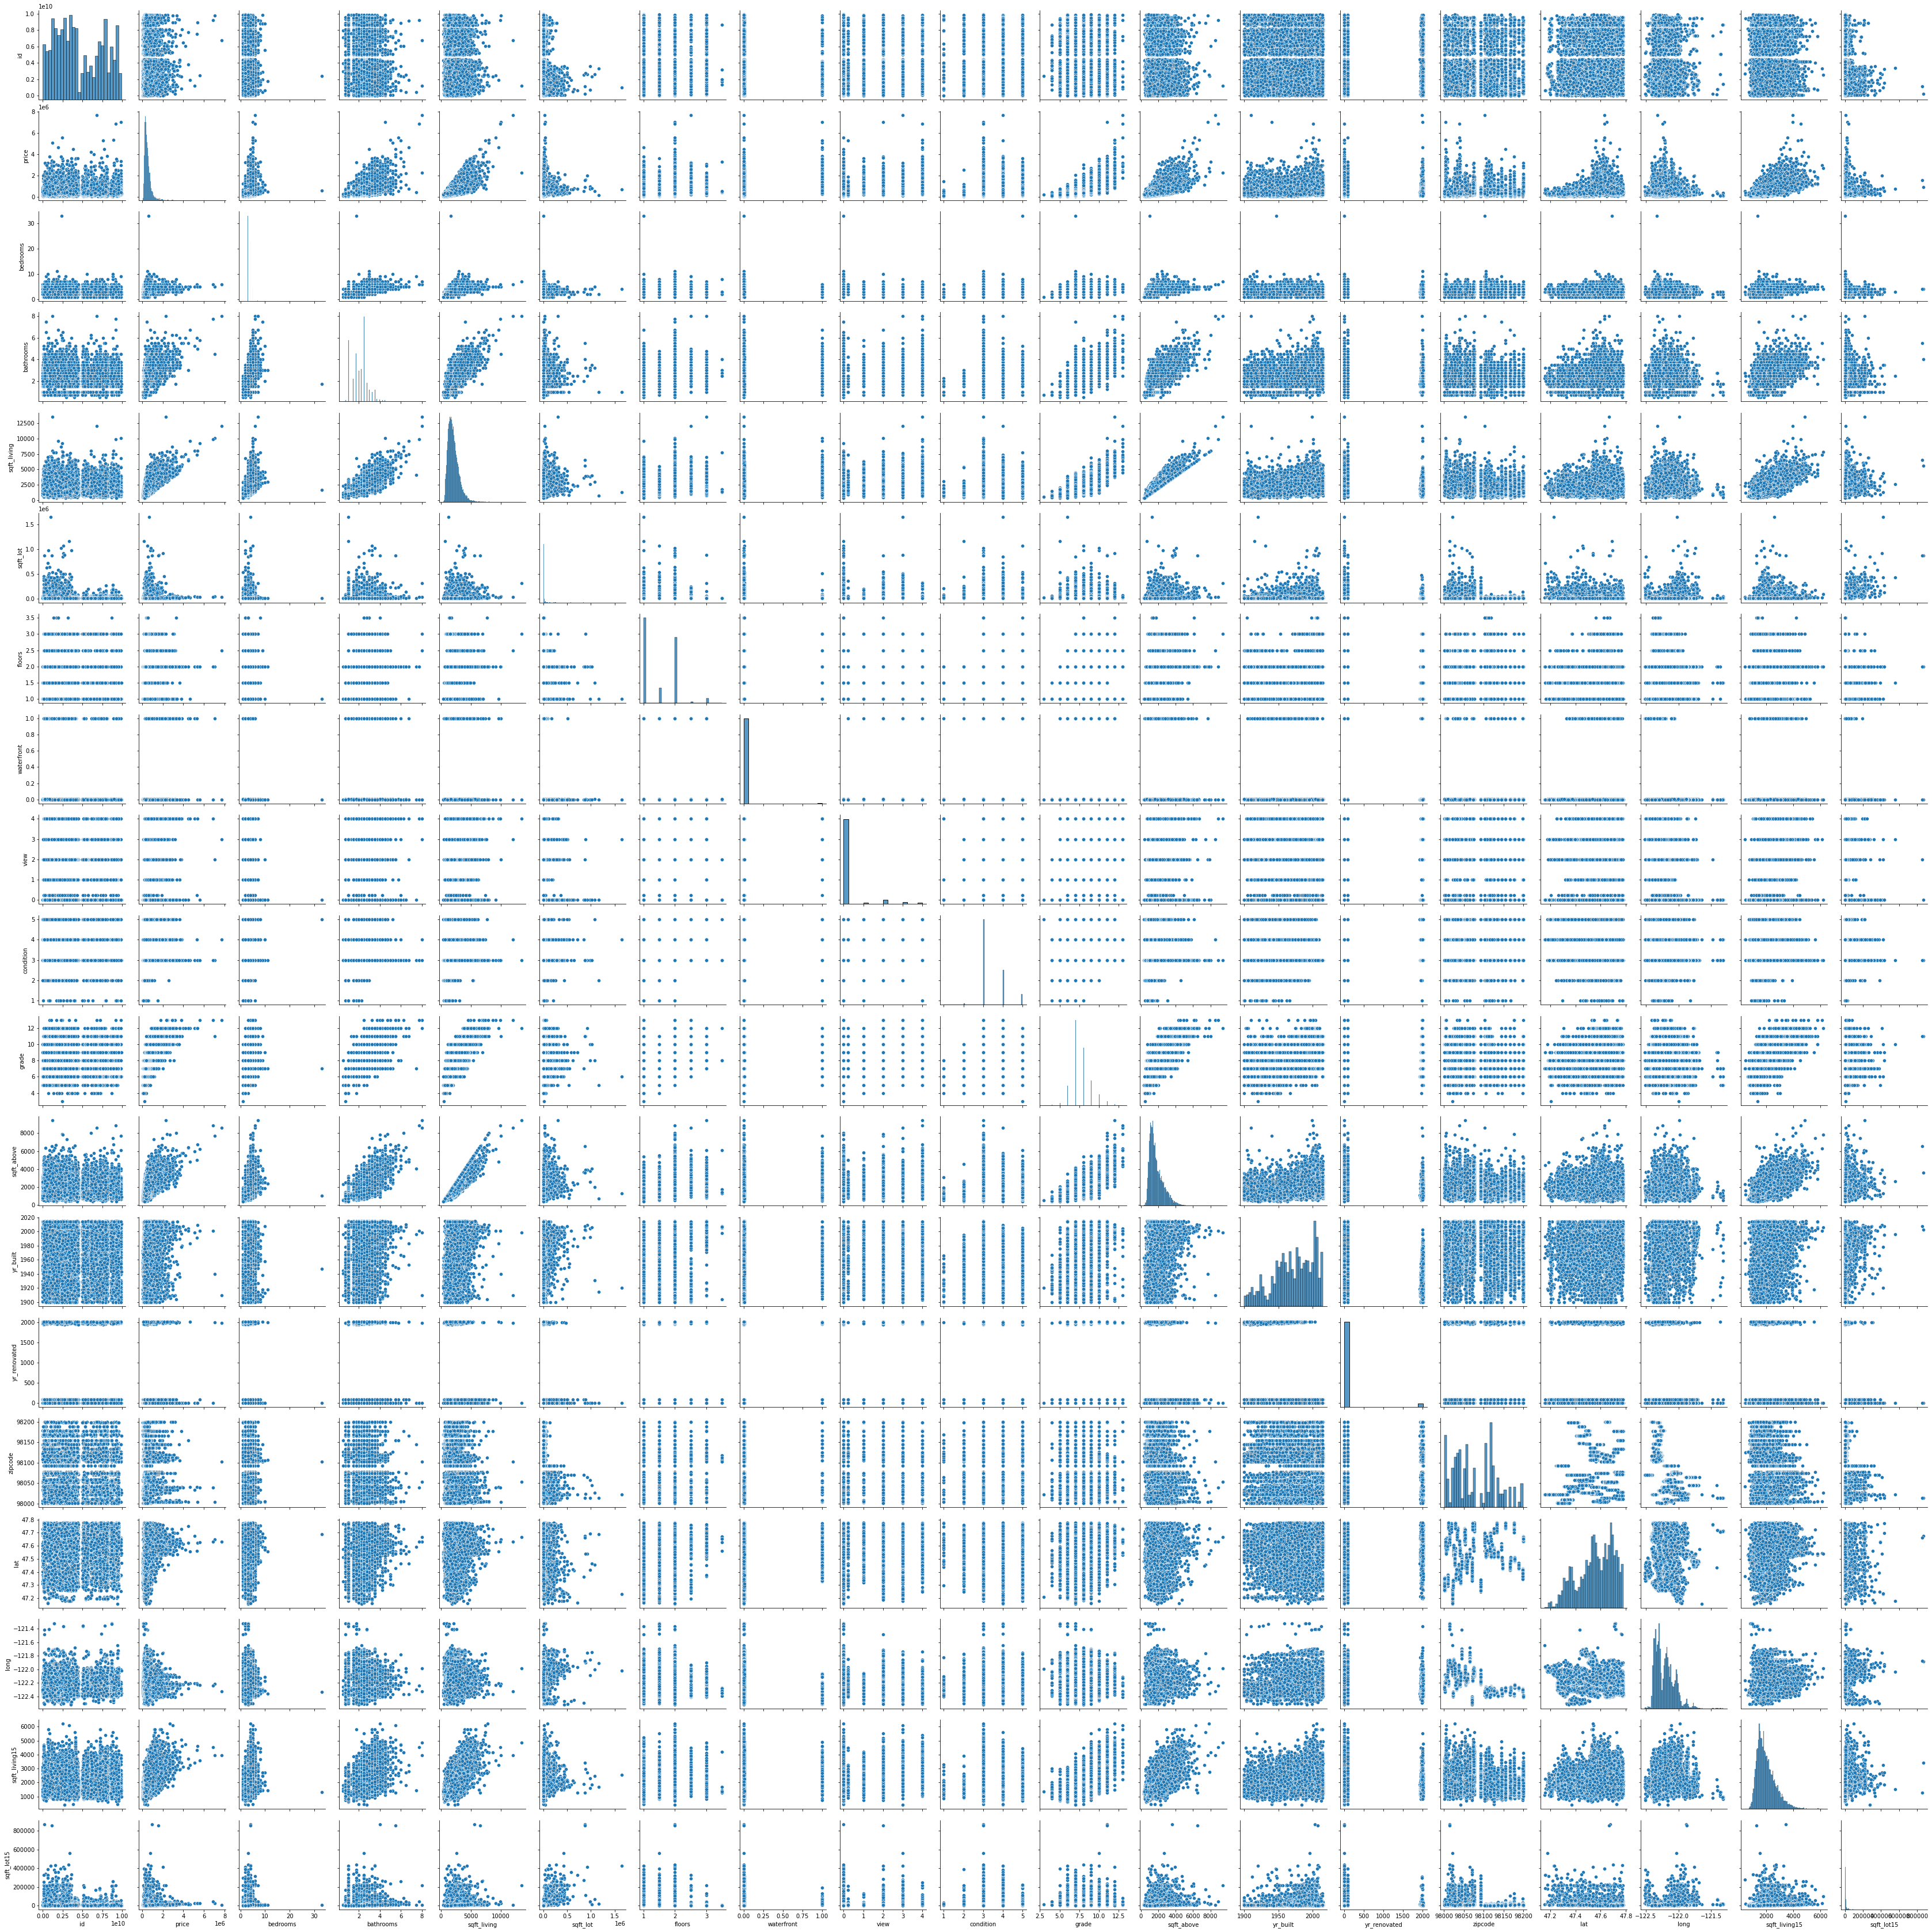

In [14]:
sns.pairplot(data=df)

## Feature Selection

Correlation HeatMap

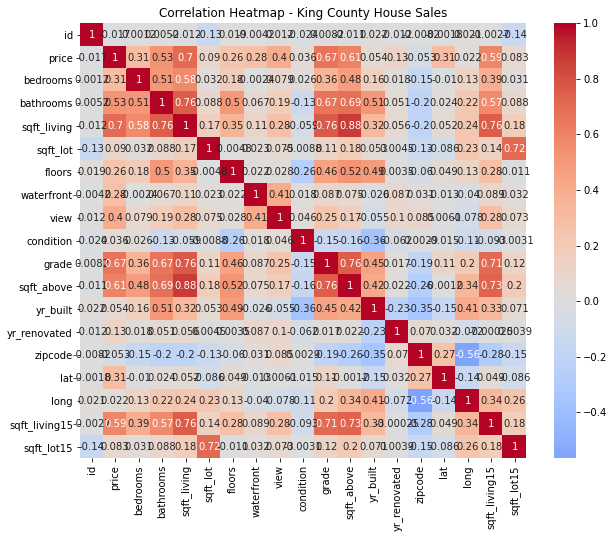

In [15]:

# Load your data into a DataFrame (replace 'your_file.csv' with your actual file)
kc = pd.read_csv('kc_house_data.csv')

# Exclude non-numeric columns for correlation calculation
kc_numeric = kc.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = kc_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, center=0)
plt.title("Correlation Heatmap - King County House Sales")
plt.show()



From this heatmap we are able to determine the features with the most corelation to price as 
sqft_living 0.7
bathrooms 0.53
grade 0.67
sqft_above 0.61
sqft_living15 0.59


In [16]:
#dealing with categorical data for better analysis
# One-hot encoding the 'grade' column
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['grade']])

# Manually create the column names
grade_categories = encoder.categories_[0]
column_names = [f'grade_{int(cat)}' for cat in grade_categories]

# Create the DataFrame with the encoded data
grades_df = pd.DataFrame(encoded, columns=column_names, dtype='int')

# Merging with the original DataFrame
df_encoded = df.join(grades_df)

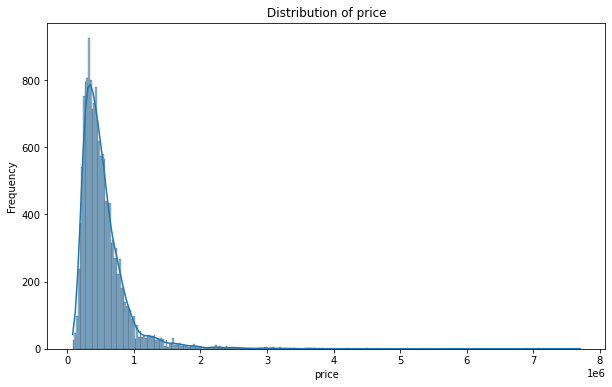

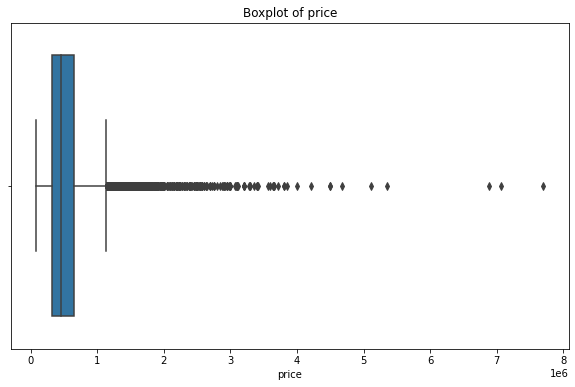

count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64


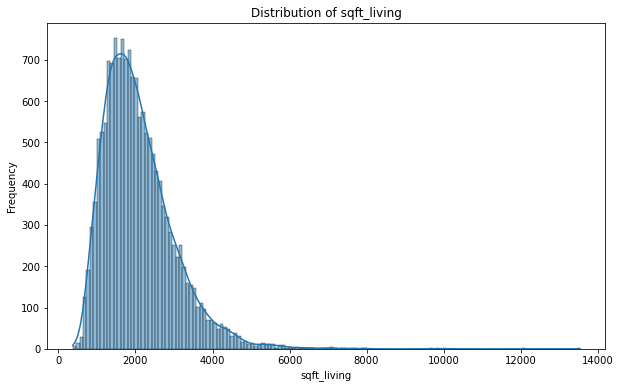

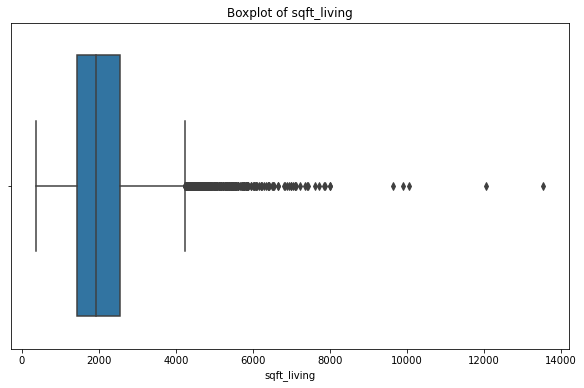

count    15762.000000
mean      2084.512372
std        918.617686
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


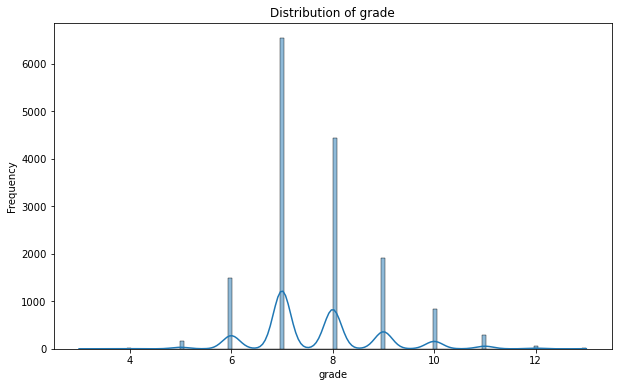

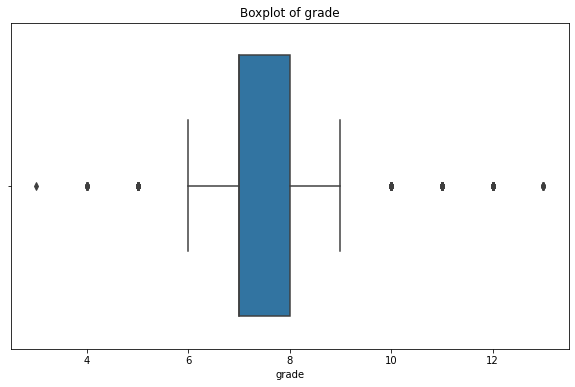

count    15762.000000
mean         7.663748
std          1.172238
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


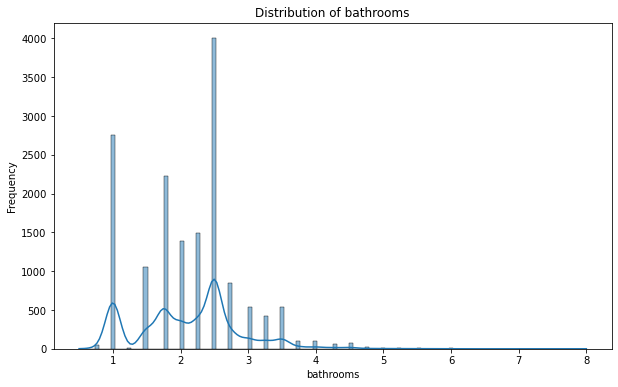

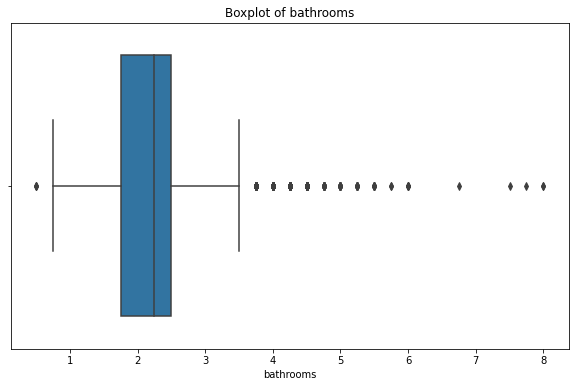

count    15762.000000
mean         2.120797
std          0.766772
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


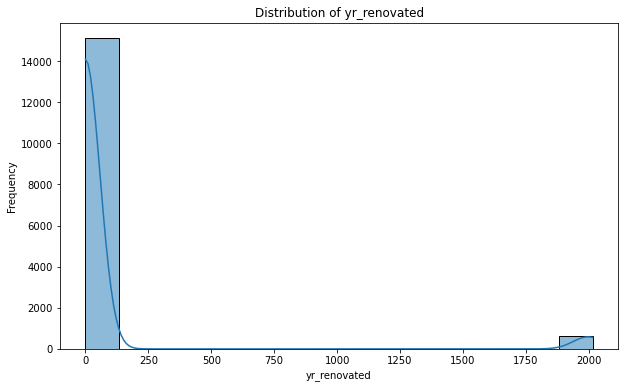

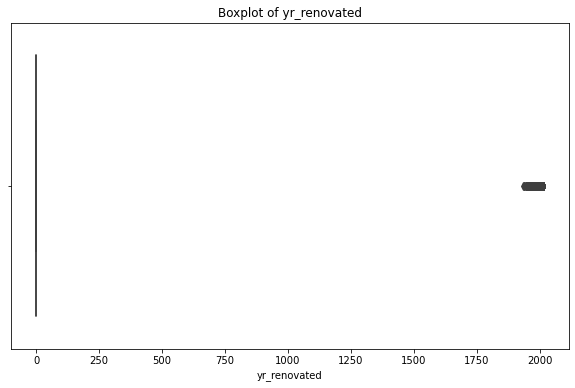

count    15762.000000
mean        82.440236
std        397.212626
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


In [28]:
# Univariate analysis for selected features
features = ['price', 'sqft_living', 'grade', 'bathrooms', 'yr_renovated'] 

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()
    
    print(df[feature].describe())


While year renovated was not a key feature, this was chose to explore impact of renovation year on price inficating addition of features such as bathroom was more relevant to potential buyers

Importance Despite Low Correlation:

Renovations Matter: Even if yr_renovated shows low correlation, renovations can significantly boost a home's value by modernizing it.
Complex Effects: The impact of renovations might not be straightforward. Simple correlation might miss the real influence renovations have.

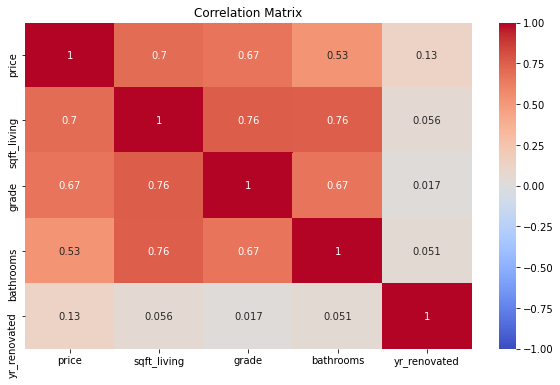

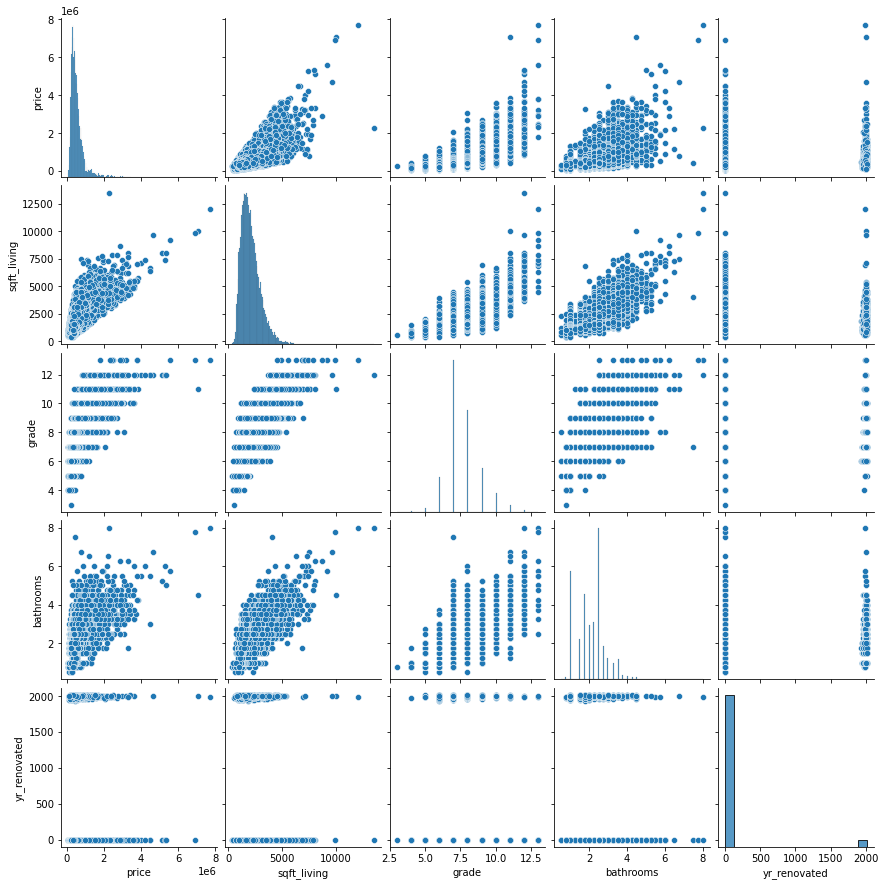

In [18]:
# Correlation matrix
corr_matrix = df[['price', 'sqft_living', 'grade', 'bathrooms', 'yr_renovated']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot matrix
sns.pairplot(df[['price', 'sqft_living', 'grade', 'bathrooms', 'yr_renovated']])
plt.show()


Established the relatioship of the selected features to each other

In [19]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Modeling

# Iteration 1

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1816.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:34:40   Log-Likelihood:            -1.7457e+05
No. Observations:               12609   AIC:                         3.492e+05
Df Residuals:                   12599   BIC:                         3.492e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.673e+05   5.74e+04      6.401      0.0

c:\Users\pcx\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389948540848304.0, tolerance: 179973770539.04727
  model = cd_fast.enet_coordinate_descent(


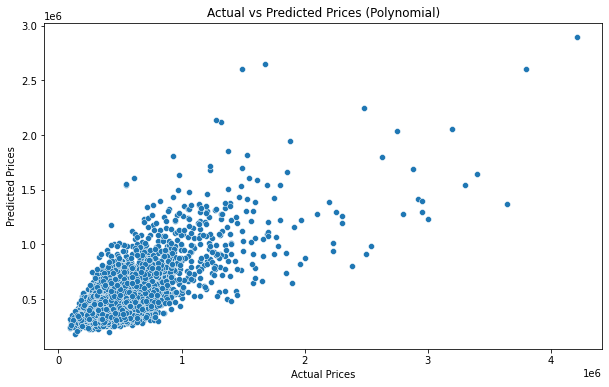

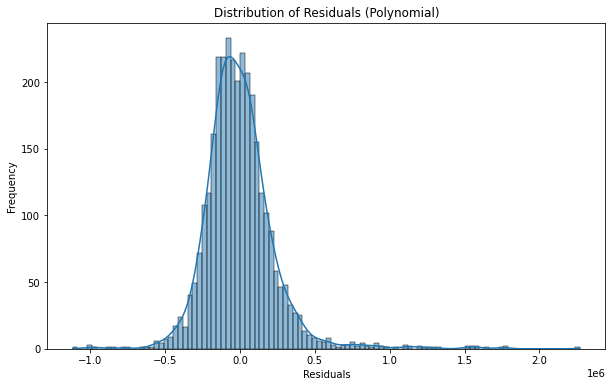

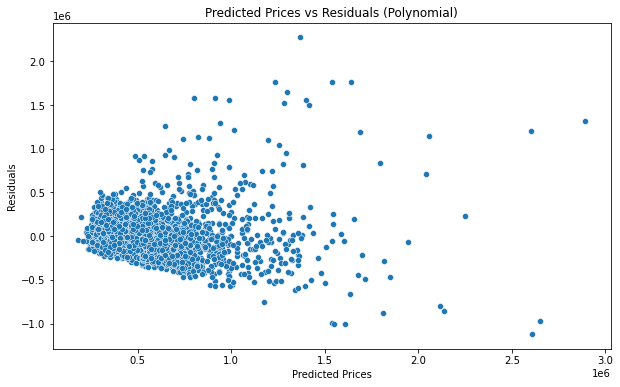

Durbin-Watson statistic (Polynomial): 2.021116236855244


In [27]:
# Features and target
features = ['sqft_living', 'bathrooms', 'yr_renovated'] + [col for col in df.columns if 'grade_' in col]
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Add constant for statsmodels
X_train_poly_sm = sm.add_constant(X_train_poly)
X_test_poly_sm = sm.add_constant(X_test_poly)

# Fit the model with polynomial features
model_poly = sm.OLS(y_train, X_train_poly_sm).fit()

# Model summary
print(model_poly.summary())

# Predictions
y_pred_poly = model_poly.predict(X_test_poly_sm)

# Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Mean Squared Error: {mse_poly}')
print(f'Polynomial R-squared: {r2_poly}')

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

# Assumption checks

# 1. Linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Polynomial)')
plt.show()

# 2. Normality of residuals
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly, kde=True)
plt.title('Distribution of Residuals (Polynomial)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_poly, y=residuals_poly)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Predicted Prices vs Residuals (Polynomial)')
plt.show()

# 4. Independence of residuals
from statsmodels.stats.stattools import durbin_watson
print(f'Durbin-Watson statistic (Polynomial): {durbin_watson(residuals_poly)}')


Model Performance
OLS Model:

Explains: 56.5% of price variations.
Accuracy: Reasonable, but there's room for improvement.
Ridge Regression:

Explains: 52.9% of price variations.
Accuracy: Slightly less effective than OLS.
Lasso Regression:

Explains: 52.9% of price variations.
Issues: Had some convergence problems, may need adjustments.
Key Insights
Important Features:
Living Space: Bigger living areas increase house prices.
Recent Renovations: Homes with recent improvements tend to be worth more.
Number of Bathrooms: Not a significant factor when adjusted for other variables.
Recommendations
Invest in Living Space and Renovations: These features significantly impact house prices and should be prioritized.
Improve Models: Explore more advanced methods and refine existing ones for better predictions.
Fine-Tune Parameters: Adjust model settings to improve accuracy and address any issues.
By focusing on these areas, we can enhance our understanding of house prices and make better investment decisions.


# Iteration 2

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     942.0
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:27:26   Log-Likelihood:            -1.7424e+05
No. Observations:               12609   AIC:                         3.485e+05
Df Residuals:                   12589   BIC:                         3.487e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e+07   5.25

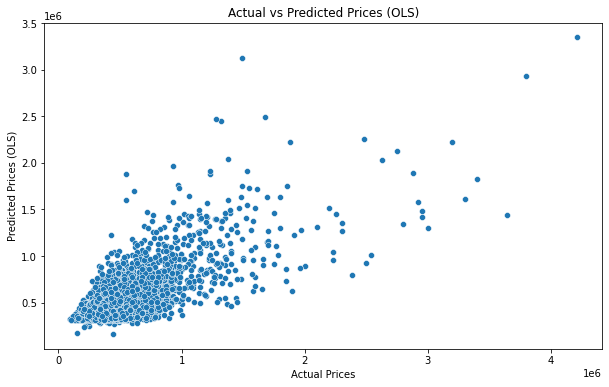

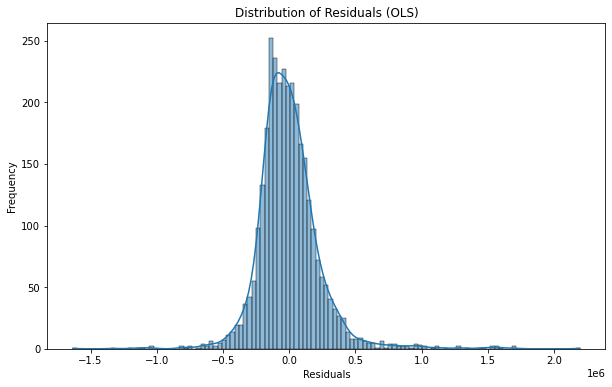

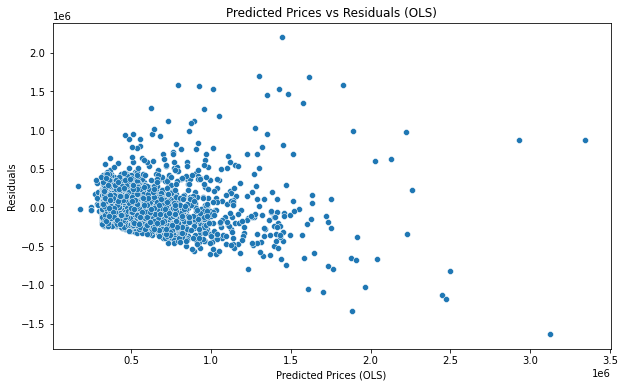

Durbin-Watson statistic (OLS): 2.0105525226953485


In [25]:
# Features and target
features = ['sqft_living', 'bathrooms', 'yr_renovated'] + [col for col in df.columns if 'grade_' in col]
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features with varying degrees
poly_degrees = [1, 2, 3]
best_degree = 1
best_mse = float('inf')

for degree in poly_degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Ridge Regression with Cross-Validation
    ridge = Ridge()
    ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
    ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
    ridge_cv.fit(X_train_poly, y_train)
    best_ridge = ridge_cv.best_estimator_
    
    y_pred_ridge = best_ridge.predict(X_test_poly)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    
    if mse_ridge < best_mse:
        best_mse = mse_ridge
        best_degree = degree

# Final polynomial features with the best degree
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# OLS Regression with Polynomial Features
X_train_poly_sm = sm.add_constant(X_train_poly)
X_test_poly_sm = sm.add_constant(X_test_poly)

model_ols = sm.OLS(y_train, X_train_poly_sm).fit()
print("OLS Regression Results:")
print(model_ols.summary())

# Predictions with OLS
y_pred_ols = model_ols.predict(X_test_poly_sm)

# Evaluation
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print(f'OLS Mean Squared Error: {mse_ols}')
print(f'OLS R-squared: {r2_ols}')

# Ridge Regression with the best degree
ridge = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

# Evaluation for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

# Assumption checks

# 1. Linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ols)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (OLS)')
plt.title('Actual vs Predicted Prices (OLS)')
plt.show()

# 2. Normality of residuals
residuals_ols = y_test - y_pred_ols
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ols, kde=True)
plt.title('Distribution of Residuals (OLS)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ols, y=residuals_ols)
plt.xlabel('Predicted Prices (OLS)')
plt.ylabel('Residuals')
plt.title('Predicted Prices vs Residuals (OLS)')
plt.show()

# 4. Independence of residuals
from statsmodels.stats.stattools import durbin_watson
print(f'Durbin-Watson statistic (OLS): {durbin_watson(residuals_ols)}')


OLS Model:

R-squared: 58.7%
Meaning: Our updated model now explains 58.7% of the variation in house prices, which is an improvement over the previous version.
Mean Squared Error (MSE): $57.3 billion
Meaning: On average, our model's price predictions are off by this amount squared, reflecting how close or far off the predictions are.
Ridge Regression:

R-squared: 52.9%
Meaning: This model explains 52.9% of the variation in house prices.
Mean Squared Error (MSE): $57.3 billion
Meaning: Similar to the OLS model, the average prediction error is this amount squared.

Key Insights
Improved Accuracy: The new OLS model better predicts house prices than before, capturing more of the price variation.
Important Features:
Some factors, like the size of the house and certain house upgrades, significantly impact the price.
Other factors are less influential and might be reconsidered for simplicity.
Next Steps
Focus on Important Factors: Concentrate on the key features that have the biggest impact on house prices.
Simplify the Model: Consider removing less significant factors to make the model more straightforward and efficient.
Ongoing Improvements: We’ll continue to refine and test our models to enhance prediction accuracy further.
This update shows our model is improving, and we’re working to make it even better for more accurate house price predictions.

# Iteration 3

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     487.4
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:27:28   Log-Likelihood:            -1.7134e+05
No. Observations:               12609   AIC:                         3.428e+05
Df Residuals:                   12535   BIC:                         3.434e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.506e+05   1973

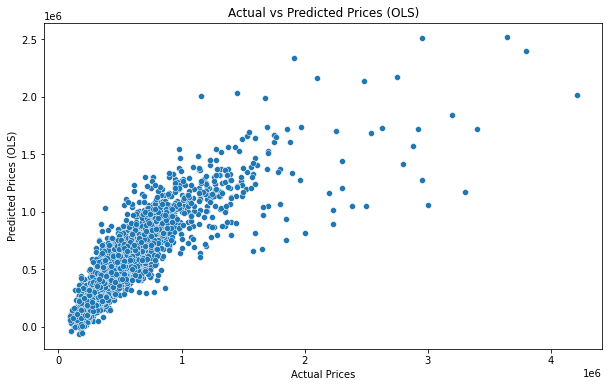

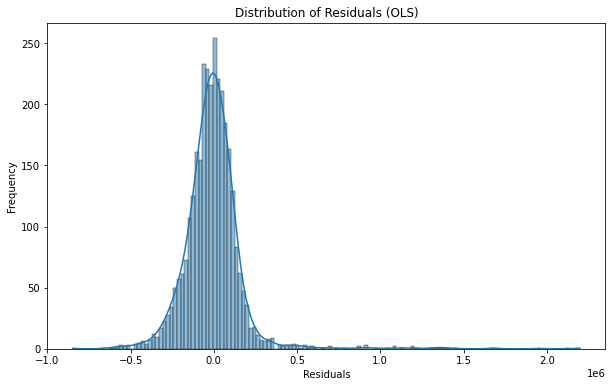

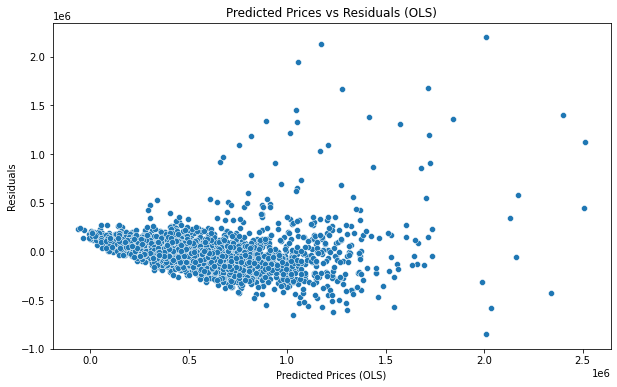

Durbin-Watson statistic (OLS): 2.003895460476746


In [26]:

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Handle missing values
df.dropna(inplace=True)

# Features and target
features = ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15', 'zipcode']
X = df[features].copy()  
y = df['price']

# Preprocess the data
# One-Hot Encode 'zipcode'
preprocessor = ColumnTransformer(
    transformers=[
        ('zip', OneHotEncoder(), ['zipcode']),
        ('num', StandardScaler(), ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15'])
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert sparse matrix to dense format
X_train_dense = X_train_transformed.toarray()
X_test_dense = X_test_transformed.toarray()

# Add constant term for OLS
X_train_sm = sm.add_constant(X_train_dense)
X_test_sm = sm.add_constant(X_test_dense, has_constant='add')

# OLS Regression
model_ols = sm.OLS(y_train, X_train_sm).fit()
print("OLS Regression Results:")
print(model_ols.summary())

# Predictions with OLS
y_pred_ols = model_ols.predict(X_test_sm)

# Evaluation
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print(f'OLS Mean Squared Error: {mse_ols}')
print(f'OLS R-squared: {r2_ols}')

# Assumption checks
# 1. Linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ols)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (OLS)')
plt.title('Actual vs Predicted Prices (OLS)')
plt.show()

# 2. Normality of residuals
residuals_ols = y_test - y_pred_ols
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ols, kde=True)
plt.title('Distribution of Residuals (OLS)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ols, y=residuals_ols)
plt.xlabel('Predicted Prices (OLS)')
plt.ylabel('Residuals')
plt.title('Predicted Prices vs Residuals (OLS)')
plt.show()

# 4. Independence of residuals
from statsmodels.stats.stattools import durbin_watson
print(f'Durbin-Watson statistic (OLS): {durbin_watson(residuals_ols)}')


## Recommendations for Homeowners
a. Focus on Key Features:

Square Footage (sqft_living): Larger homes typically have higher prices. Investing in increasing the living space (e.g., through extensions or renovations) can significantly boost the home's value.

Number of Bathrooms: Additional bathrooms can enhance a home’s value. Upgrading or adding bathrooms could be a cost-effective way to increase property value.

Square Footage Above Ground (sqft_above): Homes with more square footage above ground (not including basements) generally have higher market values. Consider renovations that add or highlight above-ground living space.

Condition and Quality of Construction (represented by grade): Higher-quality construction and recent renovations can significantly increase the home’s value. Prioritize high-quality finishes and updates.

b. Location Matters:

Zipcode: The location of a home has a substantial impact on its value. Properties in desirable or up-and-coming areas can command higher prices. Consider the local neighborhood trends and invest in areas with high growth potential.
c. Renovation and Maintenance:

Year of Renovation: Homes that have been recently renovated tend to have higher values. Regular updates and maintenance can help maintain or increase the home’s market value.
2. Recommendations for Real Estate Investors
a. Target High-Value Features:

High Square Footage: Look for properties with large living spaces or the potential to expand. These properties often have higher resale values.

Quality and Condition: Invest in properties that either already have high-quality construction or require only minor improvements to reach a high-quality standard.

b. Analyze Location:

Market Trends by Zipcode: Perform detailed market research on different zip codes. Focus on locations with rising property values or strong demand.
c. Assess Renovation Potential:

Renovation Opportunities: Identify properties that need renovations but have high potential for value increase post-renovation. This strategy can yield high returns on investment.
3. Recommendations for Homebuyers
a. Prioritize Key Features:

Living Space and Bathrooms: When choosing a home, consider the size of the living space and the number of bathrooms. Homes with these features generally offer better long-term value.
b. Evaluate Home Condition and Quality:

Renovation and Construction Quality: Pay attention to the condition of the home and the quality of construction. Higher quality and well-maintained homes often have better resale value.
c. Consider Location:

Desirable Areas: Look for homes in desirable or up-and-coming neighborhoods. Location significantly impacts property value and future appreciation.
4. Recommendations for Property Managers
a. Maintain and Upgrade Properties:

Regular Maintenance: Ensure properties are well-maintained and address repairs promptly. This helps in retaining property value and attracting higher rents.

Strategic Upgrades: Focus on upgrading key features such as bathrooms and living space. Quality renovations can justify higher rental rates.

b. Location Strategy:

Property Acquisition: Acquire properties in areas with high rental demand and potential for value increase. Regularly review market trends to make informed decisions.
c. Performance Metrics:

Track Metrics: Regularly track the performance of properties based on features and location. Use insights to guide future property investments and management strategies.
By emphasizing these aspects based on your model's findings, stakeholders can make informed decisions that maximize property value, investment returns, and overall satisfaction.

## Conclusion
Conclusion
Based on the analysis and predictive modeling of house prices using the King County House Sales dataset, we have derived several key insights that can guide future decisions for homeowners, real estate investors, homebuyers, and property managers. Our OLS regression model, which achieved an R-squared value of 0.739, highlights the significant features influencing house prices and provides a robust foundation for strategic planning.

Key Insights
Significant Features:

Square Footage (sqft_living): Larger living spaces contribute substantially to higher house prices. This feature is crucial for understanding the value dynamics of residential properties.
Number of Bathrooms: Homes with more bathrooms tend to have higher prices, suggesting that additional bathrooms are a valuable feature.
Square Footage Above Ground (sqft_above): Properties with greater above-ground square footage are valued higher, indicating that above-ground living areas are a key driver of property value.
Quality of Construction (grade): Higher-quality construction and recent renovations enhance property value significantly.
Location (zipcode): The location of a property has a substantial impact on its price, with different zip codes showing varying levels of demand and value.
Current Model Performance:

R-squared Value: The model's R-squared value of 0.739 indicates that it explains approximately 73.9% of the variability in house prices, demonstrating a strong fit.
Mean Squared Error: The model's MSE suggests a reasonable prediction accuracy, though there is room for improvement.
Assumption Checks:

Linearity: The relationship between actual and predicted prices is generally linear, but further exploration of non-linear relationships could be valuable.
Normality of Residuals: Residuals are approximately normally distributed, supporting the validity of the model's predictions.
Homoscedasticity: The variance of residuals appears consistent across predicted values, indicating no major heteroscedasticity issues.
Independence of Residuals: The Durbin-Watson statistic suggests that residuals are independent, reinforcing the reliability of the model.
Future Plans
Model Refinement:

Feature Engineering: Explore additional features or interactions between features that might improve model performance. For example, incorporating details about the age of the property or recent renovations could provide additional insights.
Advanced Techniques: Consider using advanced regression techniques such as Polynomial Regression or Gradient Boosting to capture non-linear relationships and improve prediction accuracy.
Enhanced Data Analysis:

Exploratory Data Analysis (EDA): Conduct further EDA to uncover additional patterns and insights. Investigate features such as the impact of specific renovation types or the effect of property proximity to amenities.
Correlation Analysis: Reassess feature correlations to identify potential new predictors or to refine existing ones.
Broaden Scope:

Geographical Insights: Deepen the analysis of zip code-level data to understand specific neighborhood trends and their impact on house prices.
Temporal Analysis: Examine how house prices and key features have changed over time to understand market trends and make more informed predictions.
Stakeholder Recommendations:

Homeowners: Focus on key features like living space and bathroom count when making renovations to enhance property value.
Investors: Prioritize properties with high potential for improvement in key features and strategic locations.
Homebuyers: Seek properties with desirable features and in locations with strong value appreciation trends.
Property Managers: Implement regular maintenance and strategic upgrades to maintain or increase property value.
By leveraging these insights and recommendations, stakeholders can make informed decisions that enhance property value, investment returns, and overall market strategy.